In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn import linear_model

running = np.array([[90, 180], [50, 178], [60, 179], [70, 177], [62, 180], [55, 179], [58, 177], [60, 176]])

runweight = pd.DataFrame(running)
runweight

,0,1
0,90,180
1,50,178
2,60,179
3,70,177
4,62,180
5,55,179
6,58,177
7,60,176


# By Scratch

In [2]:
runweight.columns = ['Minutes Running per Week', 'Weight by week']
runweight

,Minutes Running per Week,Weight by week
0,90,180
1,50,178
2,60,179
3,70,177
4,62,180
5,55,179
6,58,177
7,60,176


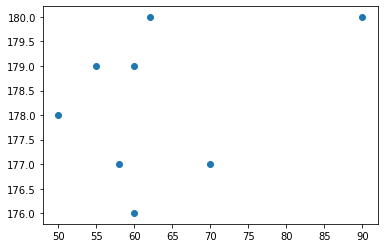

In [42]:
plt.scatter(x=runweight['Minutes Running per Week'], y=runweight['Weight by week'])
plt.show()

# Calculating Regression by Hand

### Let's calculate our Standard deviation first by finding the variance and then taking the square root.


In [4]:
# calculate mean
def mean(values):
    return sum(values) / float(len(values))
# calculate variance
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [5]:
x = runweight['Minutes Running per Week']
y = runweight['Weight by week']

mean_x, mean_y = mean(x), mean(y)
# finding the mean and variance of our variables
var_x = variance(x, mean_x)
var_y = variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=63.125 variance=1054.875
y stats: mean=178.250 variance=15.500


In [28]:
# finding the standard deviation of our variables
stdev_x = (math.sqrt(var_x))
stdev_y = (math.sqrt(var_y))
print('Standard deviation of x: %.3f' % (stdev_x))
print('Standard deviation of y: %.3f' % (stdev_y))

Standard deviation of x: 32.479
Standard deviation of y: 3.937


### Now we have our standard deviation for each. Next let's calculate the pearson correlation coefficient. First let's find the covariance which is the first part of the equation and then we will divide it by the product of our standard deviations of each variable. 

In [29]:
def covariance(x, mean_x, y, mean_y):
    covariance = 0.0
    for i in range(len(x)):
        covariance += (x[i] - mean_x) * (y[i] - mean_y)
        return covariance

In [30]:
mean_x, mean_y = mean(x), mean(y)
covariance = covariance(x, mean_x, y, mean_y)
print('Covariance: %3f' % (covariance))

Covariance: 47.031250


In [35]:
Pearson = ((covariance)/(stdev_x * stdev_y))
print('Pearson Correlation Coefficient: %.3f' % (Pearson))

Pearson Correlation Coefficient: 0.368


In [36]:
slope = (Pearson * (stdev_y / stdev_x))
print('The slope of our line is: %.3f' % (slope))

The slope of our line is: 0.045


### Now let's find the y-intercept or 'a' for our equation.

In [37]:
# to find a we need our means and b

In [38]:
a = (mean_y - (slope*mean_x))
print('The y-intercept of our line is: %.3f' % (a))

The y-intercept of our line is: 175.436


## So our regession line is:

### y = 0.045x - 175.436

In [45]:
print((0.045*70) + 175.436)

178.586


#  The quick way with SkLearn.

In [41]:
runweight.columns = ['Minutes Running per Week', 'Weight by week']
runweight

,Minutes Running per Week,Weight by week
0,90,180
1,50,178
2,60,179
3,70,177
4,62,180
5,55,179
6,58,177
7,60,176


In [42]:
runweight.corr(method='pearson')

,Minutes Running per Week,Weight by week
Minutes Running per Week,1.000000,0.349967
Weight by week,0.349967,1.000000


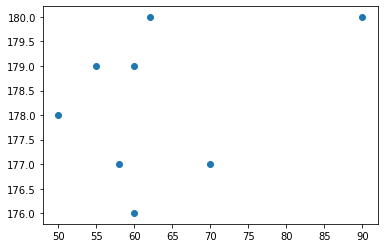

In [43]:
plt.scatter(x=runweight['Minutes Running per Week'], y=runweight['Weight by week'])
plt.show()

In [44]:
# intiate our model
regression = linear_model.LinearRegression()

In [45]:
# fit our model to our data
regression.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

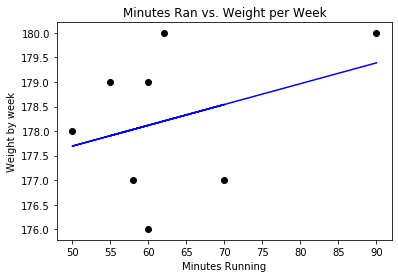

In [46]:
# plot results with scatter plot
plt.scatter(x, y, color='black')
plt.xlabel('Minutes Running')
plt.ylabel('Weight by week')
plt.title('Minutes Ran vs. Weight per Week')
plt.plot(x, regression.predict(x), color='blue')
plt.show()

In [48]:
print('Coefficients: \n', regression.coef_)
print('Intercept: \n', regression.intercept_)

Coefficients: 
 [[0.04242209]]
Intercept: 
 [175.5721057]
